## Task 1 - Exploratory Data Analysis
Based on the provided data, spend sometime doing exploratory data analysis and come up with 4 visualisations which show insights in your data
First things first - obtaining the dataset, looking at how complete the data is, cleaning up any rows/columns that need it etc.

In [1]:
#Installing required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv("task_data_set.CSV")
data.head()

#ggr = gross gaming revenue = sum of total bets made - sum of all received winnings
#ngr = net gaming revenue = gross gaming revenue - (sum of all bonuses received + sum of all taxes)

,customer_id,acquisition_source,country,date_first_deposit_id,date_registration_id,gender,date_transaction_id,count_deposit,sum_free_spin,sum_deposit,sum_bonus_cost,sum_ngr,sum_bet_real,sum_bet_bonus,sum_win_real,sum_win_bonus
0,1423,1.0,Netherlands,20100617.0,20100617.0,Male,20100630.0,11.0,2.300,250.0,0.000,-0.070,905.400,0.0,903.170,2.300
1,170,1.0,Norway,20100623.0,20091210.0,Female,20100704.0,0.0,0.000,0.0,0.000,23.963,67.321,0.0,43.357,0.000
2,1516,0.0,Sweden,20100618.0,20100618.0,Male,20100705.0,1.0,1.661,53.2,0.000,51.796,195.767,0.0,142.310,1.661
3,1612,0.0,Finland,20100620.0,20100620.0,Male,20100705.0,0.0,0.340,0.0,0.000,-0.340,0.000,0.0,0.000,0.340
4,336,1.0,United Kingdom,20100605.0,20100528.0,Male,20100705.0,0.0,0.000,0.0,-0.069,0.069,0.000,0.0,0.000,0.000


In [2]:
#Checking shape of dataframe
data.shape

(25342, 16)

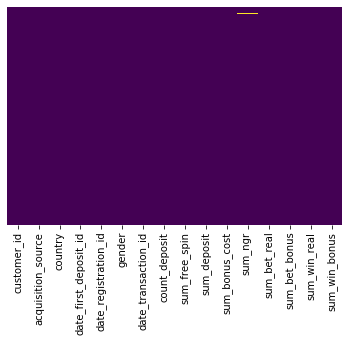

In [3]:
#Checking for missing values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
#There seems to be some missing values, having a deeper look
total_null = data.isnull().sum().sort_values(ascending= False)
total_null

date_registration_id     21
sum_deposit              19
sum_bet_bonus            15
count_deposit            13
country                  13
date_transaction_id      12
sum_win_real             11
sum_ngr                  11
gender                   11
date_first_deposit_id    11
sum_bonus_cost           10
sum_free_spin            10
acquisition_source       10
sum_win_bonus             8
sum_bet_real              6
customer_id               0
dtype: int64

In [5]:
#This actually shows the seaborn plot is not accurate enough for this method
#Calculating percentage of missing values from dataset to gauge significance
percentage_null = ((data.isnull().sum() / data.count()) * 100).sort_values(ascending=False)
percentage_null

date_registration_id     0.082935
sum_deposit              0.075031
sum_bet_bonus            0.059225
count_deposit            0.051325
country                  0.051325
date_transaction_id      0.047375
sum_win_real             0.043425
sum_ngr                  0.043425
gender                   0.043425
date_first_deposit_id    0.043425
sum_bonus_cost           0.039476
sum_free_spin            0.039476
acquisition_source       0.039476
sum_win_bonus            0.031578
sum_bet_real             0.023682
customer_id              0.000000
dtype: float64

In [6]:
#Given the small percentage of missing values, we can discard the rows rather than impute them
data.dropna(axis = 0, inplace=True)

In [7]:
#Checking dataset after dropping missing values
total_null = data.isnull().sum().sort_values(ascending= False)
total_null

sum_win_bonus            0
sum_win_real             0
sum_bet_bonus            0
sum_bet_real             0
sum_ngr                  0
sum_bonus_cost           0
sum_deposit              0
sum_free_spin            0
count_deposit            0
date_transaction_id      0
gender                   0
date_registration_id     0
date_first_deposit_id    0
country                  0
acquisition_source       0
customer_id              0
dtype: int64

In [8]:
#Checking if customer_id is duplicated or whether they are aggregated in one row
duplicated = any(data['customer_id'].duplicated())
duplicated

True

In [9]:
#Looking at number of customers, countries in columns
number_of_customers = data['customer_id'].nunique()
number_of_countries = data['country'].nunique()

print("There is a total of {} customers from {} countries".format(number_of_customers, number_of_countries))

There is a total of 5167 customers from 31 countries


In [10]:
#Countries in list
print("List of countries: {}".format(sorted(set(data['country']))))

List of countries: ['Austria', 'Bahrain', 'Belarus', 'Bosnia and Herzegovina', 'Canada', 'Chile', 'Croatia', 'Finland', 'Georgia', 'Germany', 'Guernsey', 'Iceland', 'Ireland', 'Isle of Man', 'Jersey', 'Luxembourg', 'Macedonia, the former Yugoslav Republic of', 'Malta', 'Mexico', 'Moldova, Republic of', 'Netherlands', 'New Zealand', 'Norway', 'Russian Federation', 'Saudi Arabia', 'Serbia', 'Sweden', 'Switzerland', 'Ukraine', 'United Arab Emirates', 'United Kingdom']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

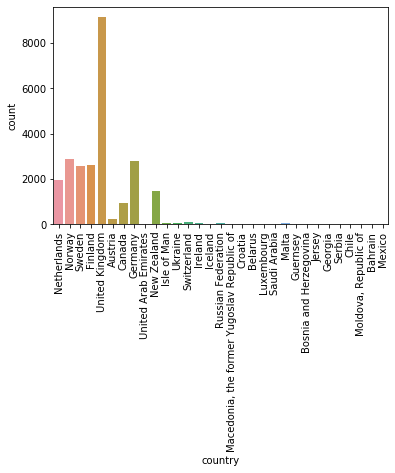

In [11]:
#Let's look at where the highest customer provenance is

sns.countplot(x='country', data=data)
plt.xticks(rotation="90")

In [12]:
'''It seems like most customers come from the United Kingdom, 
Scandinavia, Germany and the Netherlands, with a surprising amount from New Zealand, and Canada'''
#Let's also look at gender, first of all is it encoded in a binary fashion?
number_of_genders = data['gender'].nunique()
print(number_of_genders)

2


(array([0, 1]), <a list of 2 Text xticklabel objects>)

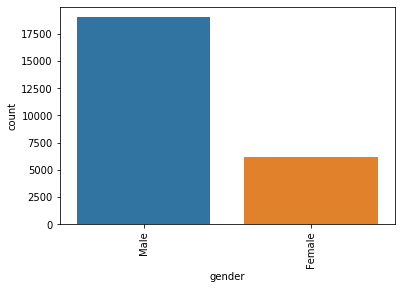

In [13]:
#Looking at the gender distribution. My initial assumption is that more males play.
sns.countplot(x='gender', data=data)
plt.xticks(rotation="90")

In [14]:
#What about the dates, initial deposit date, initial transaction date?
print(data.dtypes)

#seems we need to convert dates into date_time - date_first_deposit_id, date_registration_id, date_transaction_id
data['date_transaction_id'] = pd.to_datetime(data['date_transaction_id'], format='%Y%m%d', errors='raise')
# print(data['date_transaction_id'])
#this works fine

data['date_first_deposit_id'] = pd.to_datetime(data['date_first_deposit_id'], format='%Y%m%d', errors='raise')
# print(data['date_first_deposit_id'])
#this also works fine

# data['date_registration_id'] = pd.to_datetime(data['date_registration_id'], format='%Y%m%d', errors='raise')
# print(data['date_registration_id'])
#this is throwing a "ValueError: day is out of range for month" error so need to look at dates

customer_id                int64
acquisition_source       float64
country                   object
date_first_deposit_id    float64
date_registration_id     float64
gender                    object
date_transaction_id      float64
count_deposit            float64
sum_free_spin            float64
sum_deposit              float64
sum_bonus_cost           float64
sum_ngr                  float64
sum_bet_real             float64
sum_bet_bonus            float64
sum_win_real             float64
sum_win_bonus            float64
dtype: object


In [15]:
#Investigating the dates giving an error

'''This will change all the rows to datetime, and force the ones giving an error to Null status. 
We are creating a new column so we can then look at the original value'''

data['clean_date_registration_id'] = pd.to_datetime(data['date_registration_id'], format='%Y%m%d', errors='coerce')

#Checking which are NaT
# print(data['date_registration_id'].loc[data['clean_date_registration_id'].isnull()])

#Seems the issue is coming from February 29th. Let's change these to March 1st.
from pandas import Timestamp
data['clean_date_registration_id'] = data['clean_date_registration_id'].fillna(Timestamp('20090301'))

#Making sure issue is resolved
print(data['clean_date_registration_id'].loc[data['clean_date_registration_id'].isnull()])

Series([], Name: clean_date_registration_id, dtype: datetime64[ns])


C:\Users\Shaun\Anaconda3\envs\GIG\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


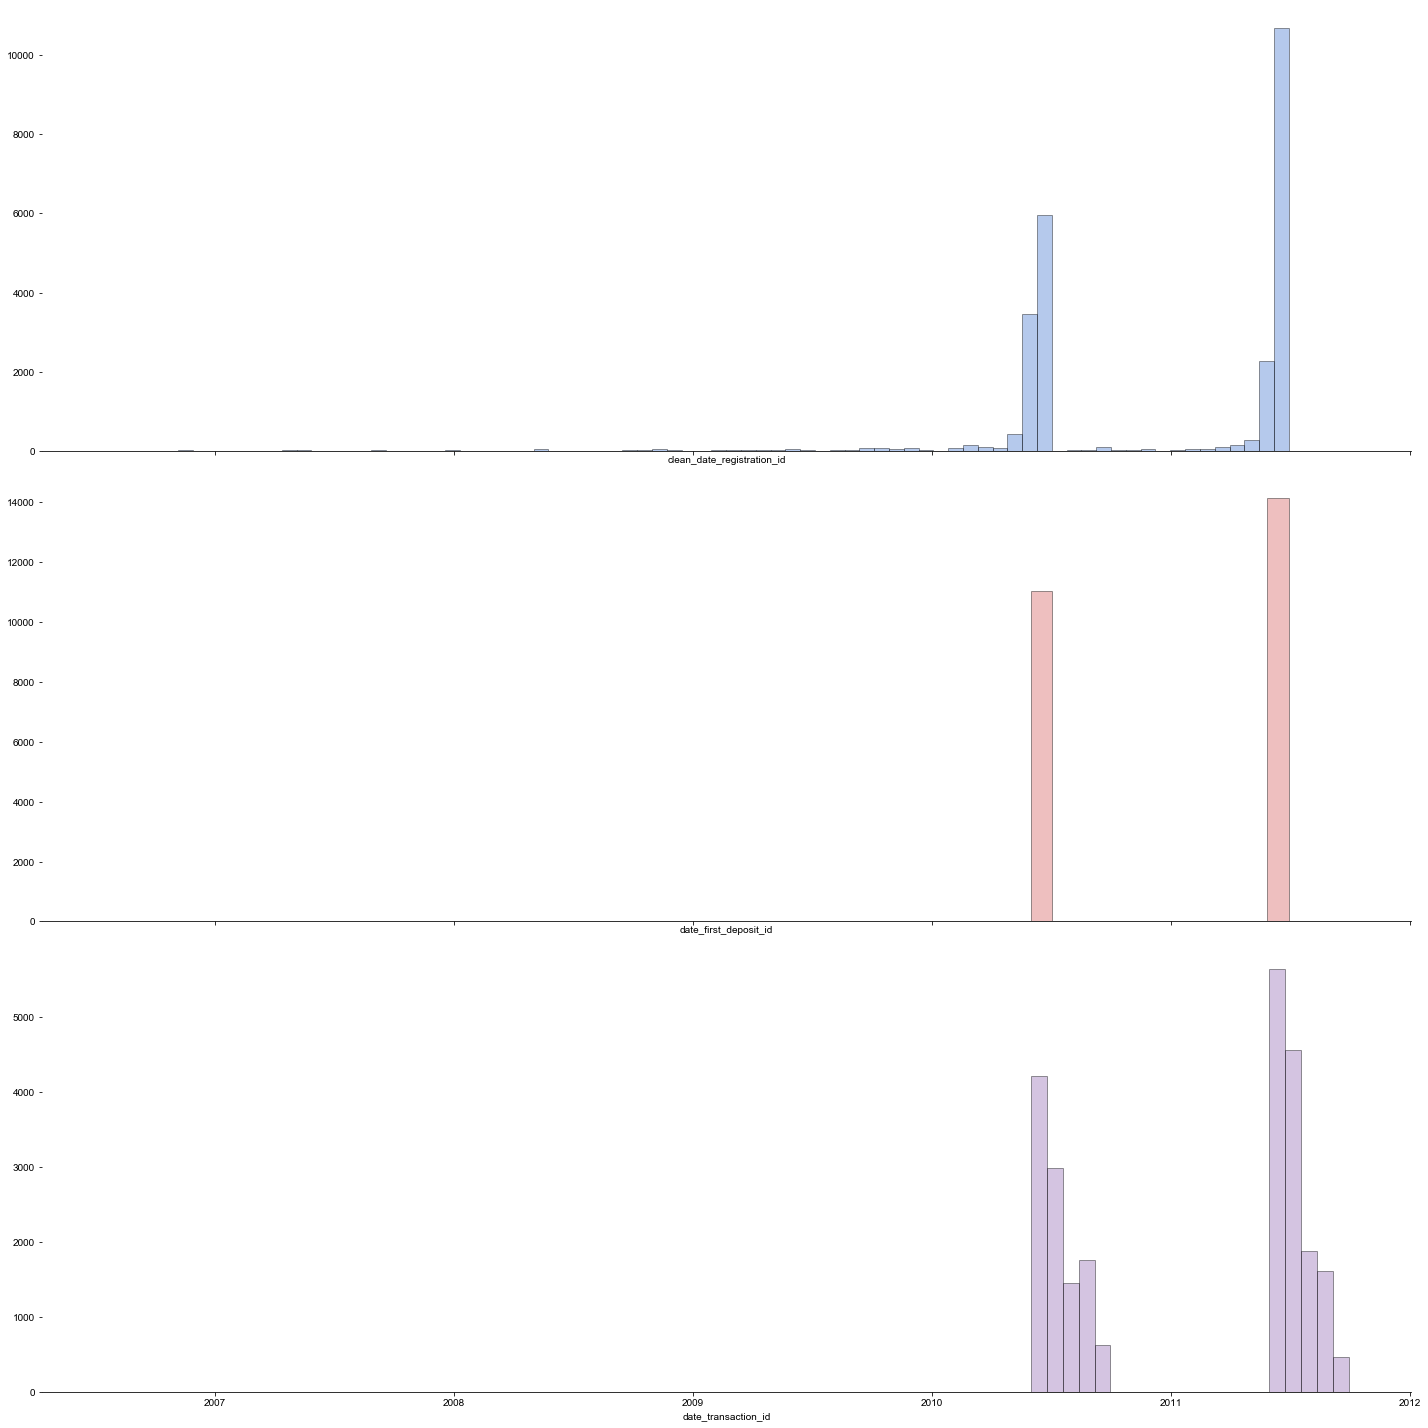

In [16]:
#Visualising the Date information we have
f, axes = plt.subplots(3,1, figsize=(20, 20), sharex=True)
sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

# Plot Date Registration histogram
sns.distplot(data['clean_date_registration_id'], hist=True, kde=False,
               bins=int(80),
             hist_kws={'edgecolor':'black'}, ax=axes[0], color = 'b')

# Plot Date of First Deposit histogram
sns.distplot((data['date_first_deposit_id']), hist=True, kde=False,
                 bins=int(12), 
             hist_kws={'edgecolor':'black'}, ax=axes[1], color = 'r')

# Plot Date of Transaction histogram
sns.distplot((data['date_transaction_id']), hist=True, kde=False,
                 bins=int(20),
             hist_kws={'edgecolor':'black'}, ax=axes[2], color = 'm')

plt.tight_layout()

The visualisations tell us that there seems to be a very high tendency for mid-year registrations and first deposits, specifically June. We'll confirm this with a counter later on.

In [17]:
#Counting the instances per month
counts_registration_date = pd.Series(index=data['clean_date_registration_id'], data = np.array(data.count)).resample('M').count()
counts_1st_deposit_date = pd.Series(index=data['date_first_deposit_id'], data = np.array(data.count)).resample('M').count()
counts_transaction_date = pd.Series(index=data['date_transaction_id'], data = np.array(data.count)).resample('M').count()

print(counts_registration_date,counts_1st_deposit_date, counts_transaction_date )

clean_date_registration_id
2006-07-31        3
2006-08-31        4
2006-09-30        0
2006-10-31        2
2006-11-30       28
2006-12-31        6
2007-01-31        0
2007-02-28        0
2007-03-31        2
2007-04-30       21
2007-05-31       18
2007-06-30        4
2007-07-31        7
2007-08-31        0
2007-09-30       34
2007-10-31        4
2007-11-30        4
2007-12-31       31
2008-01-31       11
2008-02-29        9
2008-03-31        0
2008-04-30        3
2008-05-31       59
2008-06-30        0
2008-07-31        2
2008-08-31       15
2008-09-30       41
2008-10-31       38
2008-11-30       54
2008-12-31       18
2009-01-31       20
2009-02-28       30
2009-03-31       34
2009-04-30       40
2009-05-31       25
2009-06-30       79
2009-07-31       24
2009-08-31       52
2009-09-30       62
2009-10-31       86
2009-11-30       83
2009-12-31       81
2010-01-31       41
2010-02-28      133
2010-03-31      159
2010-04-30       77
2010-05-31      750
2010-06-30     9104
2010-07-31   

For some reason, only June is showing first deposit instances. Transactions are dropping off after 3/4 months, which confirms what the dataset description says.

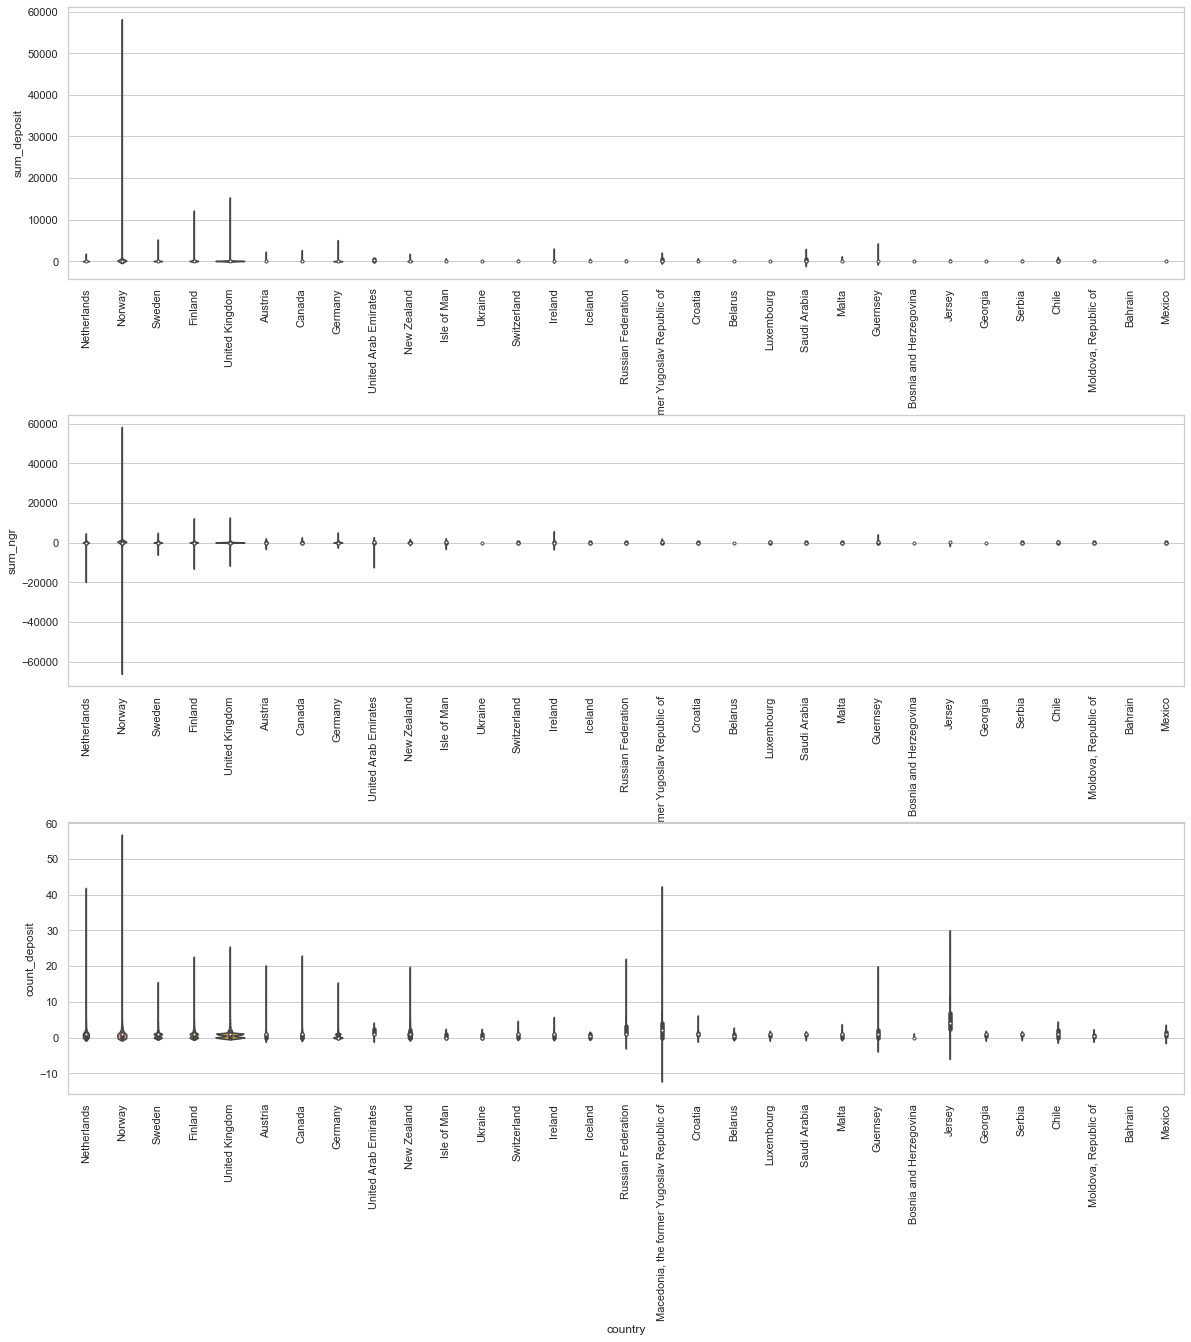

In [18]:
#Visualising some of the continuous data
# Set theme
sns.set_style('whitegrid')

f, axes = plt.subplots(3,1, figsize=(20, 20), sharex=False)

# Violin plot for Deposit Sum
sns.violinplot(x='country', y='sum_deposit', data=data, ax=axes[0], scale = "count")

# Violin plot for NGR sum
sns.violinplot(x='country', y='sum_ngr', data=data, ax=axes[1], scale = "count")

# Violin plot for Number of Deposits
sns.violinplot(x='country', y='count_deposit', data=data, ax=axes[2], scale = "count")

f.subplots_adjust(hspace=.5)

for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

This has given us some insights to look closer into:

1) Norway seems to have a large spread of deposit instances and amounts, and a large variance of NGR, maybe some of the customers need to be looked into cause they are reducing profit through low NGR.
2) Netherlands seems to have a lower NGR, maybe a case of addressing these low-profit customers. Same goes for UAE.
3) Jersey seems to deposit a larger quantity of deposits, but a lower monetary value. Why?


In [19]:
#Looking closer into the data

data_ngr_details = data[['country','sum_ngr', 'sum_bet_real', 'count_deposit', 'sum_deposit']]
data_ngr_details.groupby("country").describe()

sum_ngr                           \
                                             count        mean          std   
country                                                                       
Austria                                      220.0   -3.696750   393.249688   
Bahrain                                        1.0  131.457000          NaN   
Belarus                                       12.0    6.956167    22.918732   
Bosnia and Herzegovina                        27.0    1.222222     3.446204   
Canada                                       921.0   26.378118   128.724849   
Chile                                          8.0  158.079250   242.742778   
Croatia                                       24.0   16.315250    53.873351   
Finland                                     2629.0   20.910095   516.356724   
Georgia                                        3.0  -21.000000    32.140317   
Germany                                     2787.0    7.848688   235.826876   
Guernsey                                      24.0  245.433208   795.962074   
Iceland                                       10.0   86.980700   138.936722   
Ireland                                       70.0   86.786914   842.603955   
Isle of Man                                   51.0  -57.564353   661.141579   
Jersey                                        23.0   15.238478   334.708670   
Luxembourg                                     3.0   46.334333    50.371740   
Macedonia, the former Yugoslav Republic of     9.0  266.131333   473.024201   
Malta                                         39.0    3.476667    93.517519   
Mexico                                         3.0   20.649000    24.897078   
Moldova, Republic of                           2.0    9.348500    89.644876   
Netherlands                                 1964.0    5.398371   505.295064   
New Zealand                                 1480.0   16.083591   101.164687   
Norway                                      2860.0    6.111550  1786.620418   
Russian Federation                            64.0   18.822891   101.696716   
Saudi Arabia                                   4.0 -131.249750   208.793497   
Serbia                                         4.0   21.800750    42.950651   
Sweden                                      2589.0    5.694173   357.519633   
Switzerland                                  103.0   12.930068   131.999483   
Ukraine                                       76.0    0.357382    14.087377   
United Arab Emirates                          23.0 -238.653000  2176.383932   
United Kingdom                              9129.0    6.641754   444.693803   

                                                                            \
                                                  min        25%       50%   
country                                                                      
Austria                                     -3056.849   -4.78000   10.0150   
Bahrain                                       131.457  131.45700  131.4570   
Belarus                                       -28.103   -0.49250    0.0550   
Bosnia and Herzegovina                        -12.849    0.70000    1.7300   
Canada                                       -687.931    0.00000    7.6100   
Chile                                          -3.971    0.82200   67.1435   
Croatia                                      -191.180    0.00000   19.9700   
Finland                                    -13050.250   -0.05000   10.9100   
Georgia                                       -58.000  -31.50000   -5.0000   
Germany                                     -2480.000   -0.44500    2.0000   
Guernsey                                     -171.195    0.06500   23.7610   
Iceland                                       -45.448    1.38825   17.5725   
Ireland                                     -2806.810    0.00000    0.1050   
Isle of Man                                 -2687.014 -287.60650   76.8140   
Jersey                        

The casino seems to be losing money off UAE, Saudi Arabia, Isle of Man and Georgia principally, however these are coming from very few players.
Norway has the largest spread, with the very low min ngr and very high max ngr. The UK, with 3 times the number of players, has a similar mean but much less of a spread in terms of std dev.
UAE and Saudi have a very high bet mean, would mean high value players.

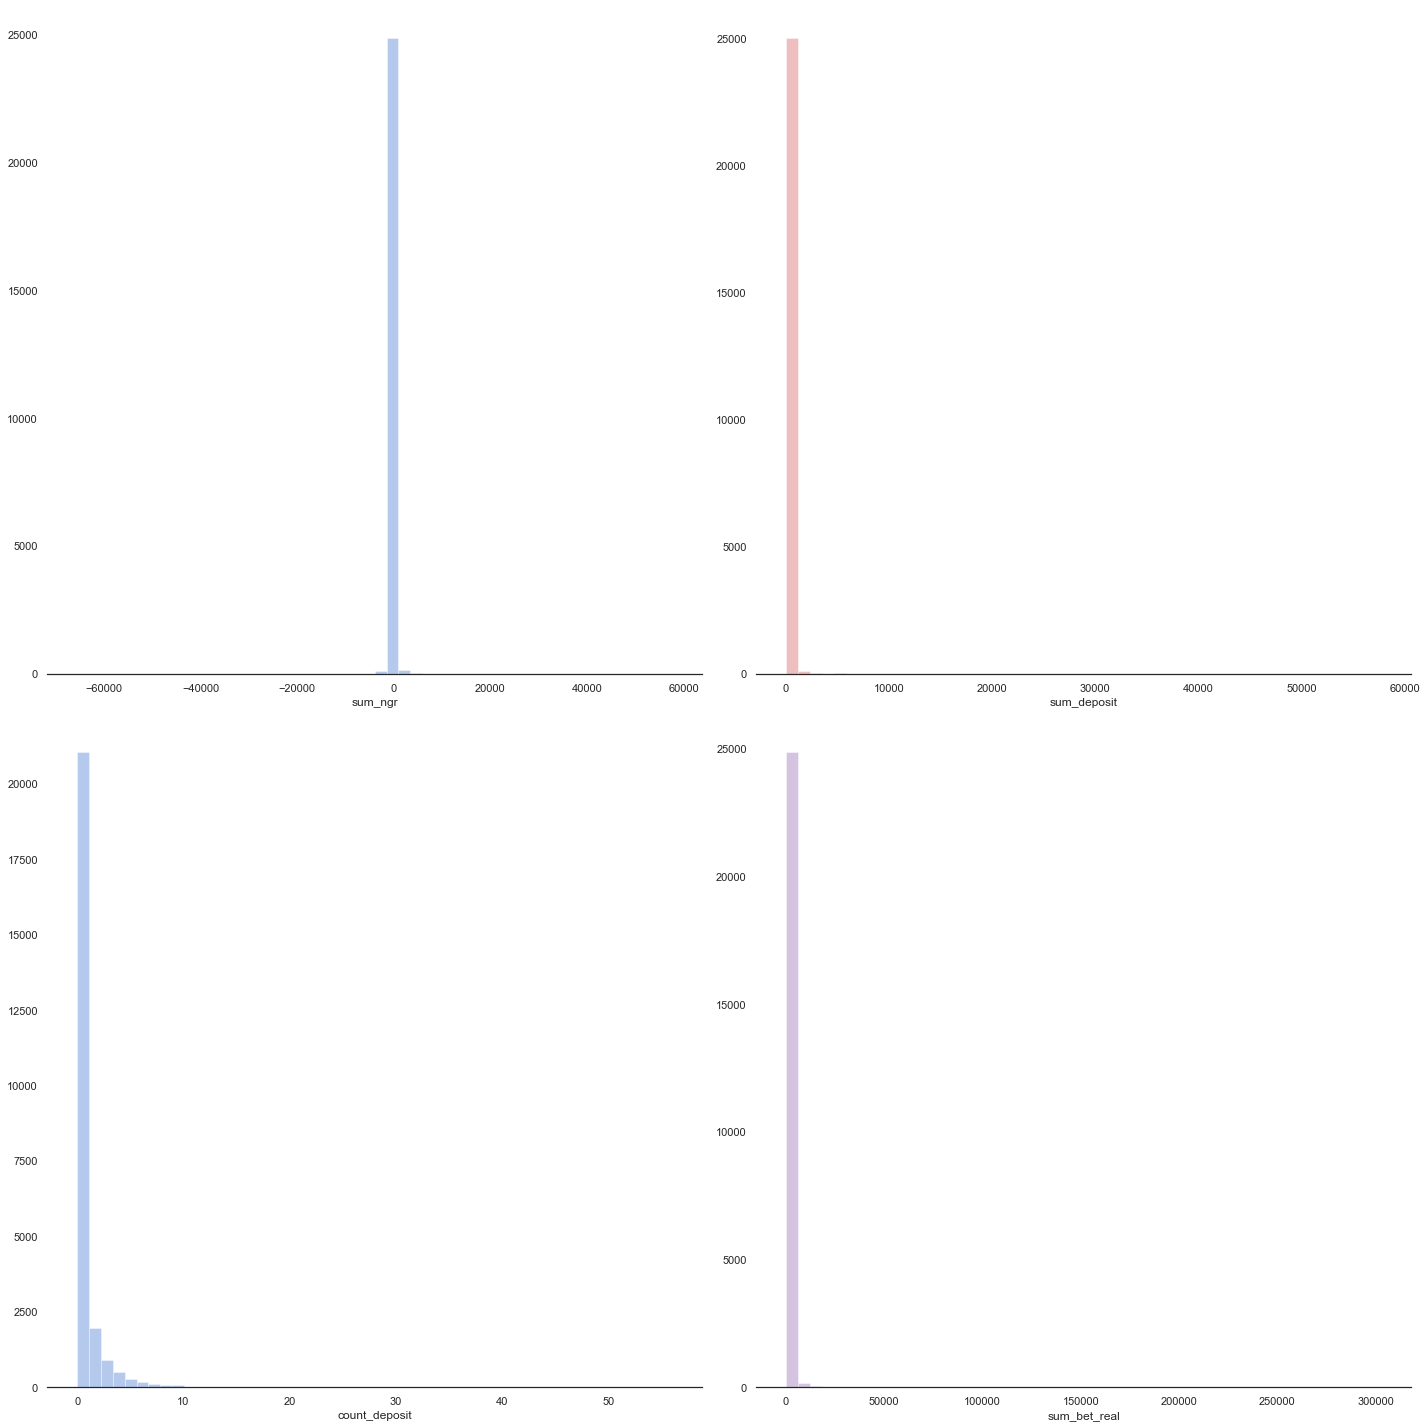

In [20]:
#Visualising some of the continuous data without country granularity

sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(2, 2, figsize=(20, 20), sharex= False)
sns.despine(left=True)

sns.distplot(data_ngr_details['sum_ngr'], kde=False, color="b", ax=axes[0, 0])
sns.distplot(data_ngr_details['sum_deposit'], kde=False, color="r", ax=axes[0, 1])
sns.distplot(data_ngr_details['count_deposit'], kde=False, ax=axes[1, 0])
sns.distplot(data_ngr_details['sum_bet_real'], kde=False, color="m", ax=axes[1, 1])

plt.tight_layout()

In [23]:
data_ngr_details.describe()

,sum_ngr,sum_bet_real,count_deposit,sum_deposit
count,25162.000000,25162.000000,25162.000000,25162.000000
mean,9.501080,430.993975,0.972458,65.888219
std,715.630634,3789.387621,1.611136,473.715971
min,-65524.977000,-0.637000,0.000000,0.000000
25%,-0.336750,0.000000,0.000000,0.000000
50%,5.000000,7.667000,1.000000,11.240000
75%,38.849000,116.256000,1.000000,48.800000
max,57598.275000,302879.545000,56.000000,57724.500000


Points of note:

1) NGR mean of 9.5, std dev of 715. Too low, the deviation means that the casino is not making profit off a lot of the players.
2) Count_Deposit mean is 0.97, std dev of 1.611 - players are not depositing frequently. Sum_deposit is 65 which perhaps can be incentivised together with frequency? A balance needs to be found here between count and sum.

In [43]:
#Let's try to understand more if there is a relationship between the individual players and the performance.

data = data.groupby('customer_id').apply(pd.DataFrame.sort_values, 'customer_id')
player_data = data.drop(['date_registration_id'], axis=1)
print("Number of unique customers is {}".format(len(player_data.customer_id.unique())))
player_data.head(n=20)

Number of unique customers is 5167


customer_id  acquisition_source  country  \
customer_id                                                   
1           12021            1                 1.0   Sweden   
2           11817            2                 1.0  Finland   
            16949            2                 1.0  Finland   
3           2997             3                 0.0   Norway   
4           13830            4                 1.0   Sweden   
            18234            4                 1.0   Sweden   
            20280            4                 1.0   Sweden   
5           9229             5                 0.0   Sweden   
            21346            5                 0.0   Sweden   
6           15649            6                 1.0   Norway   
7           3700             7                 0.0  Finland   
            6805             7                 0.0  Finland   
            19621            7                 0.0  Finland   
8           850              8                 1.0  Finland   
            2894             8                 1.0  Finland   
            3100             8                 1.0  Finland   
            4821             8                 1.0  Finland   
            5278             8                 1.0  Finland   
9           12607            9                 1.0  Finland   
            24493            9                 1.0  Finland   

                  date_first_deposit_id  gender date_transaction_id  \
customer_id                                                           
1           12021            2011-06-24    Male          2011-06-24   
2           11817            2010-06-11    Male          2010-06-12   
            16949            2010-06-11    Male          2010-06-11   
3           2997             2010-06-30    Male          2010-06-30   
4           13830            2010-06-16    Male          2010-06-17   
            18234            2010-06-16    Male          2010-06-16   
            20280            2010-06-16    Male          2010-08-06   
5           9229             2010-06-09    Male          2010-06-09   
            21346            2010-06-09    Male          2010-06-11   
6           15649            2011-06-21  Female          2011-06-21   
7           3700             2011-06-14    Male          2011-07-16   
            6805             2011-06-14    Male          2011-06-14   
            19621            2011-06-14    Male          2011-08-15   
8           850              2010-06-20    Male          2010-06-20   
            2894             2010-06-20    Male          2010-06-21   
            3100             2010-06-20    Male          2010-08-15   
            4821             2010-06-20    Male          2010-06-28   
            5278             2010-06-20    Male          2010-06-24   
9           12607            2011-06-09    Male          2011-06-09   
            24493            2011-06-09    Male          2011-09-01   

                   count_deposit  sum_free_spin  sum_deposit  sum_bonus_cost  \
customer_id                                                                    
1           12021            1.0           0.00       145.65         145.335   
2           11817            0.0           0.00         0.00           0.000   
            16949            1.0           0.00        20.00          30.000   
3           2997             1.0           0.00        52.40           0.000   
4           13830            4.0           0.00       204.80           0.000   
            18234            1.0           0.00        51.20           0.000   
            20280            2.0           0.00        52.16           0.000   
5           9229             5.0           0.00       524.95           0.000   
            21346            2.0           0.00       315.18           0.000   
6           15649            1.0           0.00        10.59           0.000   
7           3700             0.0           0.00         0.00           5.000   
            6805             

In [25]:
'''What can we establish from the information we have on the customers? 
Can we cluster them together in terms of their transaction metrics?'''

In [24]:
export_csv = data.to_csv (r'cleaned_data.csv', index = None, header=True)